In [11]:
import csv
import matplotlib.pyplot as plt 

In [12]:
matches_csv = csv.DictReader(open("matches.csv"))
deliveries_csv = csv.DictReader(open("deliveries.csv"))

In [3]:
years_dist = {}
for row in matches_csv:
    if row['season'] not in years_dist.keys():
        years_dist[row['season']] = 0
    years_dist[row['season']] += 1

Text(0, 0.5, 'No of matches')

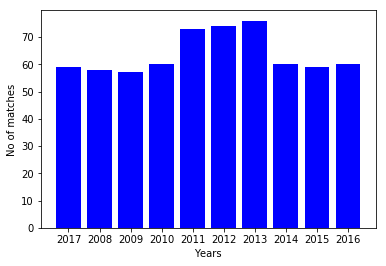

In [5]:
plt.bar(list(years_dist.keys()), list(years_dist.values()), color='b')
plt.xlabel("Years")
plt.ylabel("No of matches")

In [10]:
teams_dist = {}
for row in matches_csv:
    if row['winner'] not in teams_dist.keys():
        teams_dist[row['winner']] = 0
    teams_dist[row['winner']] += 1

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

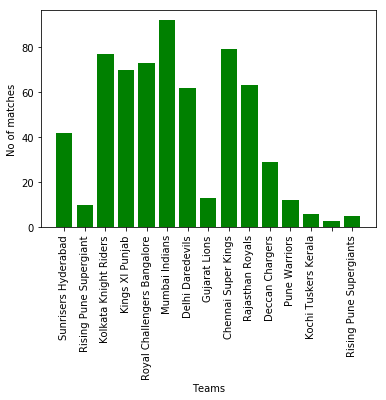

In [11]:
plt.bar(list(teams_dist.keys()), list(teams_dist.values()), color='g')
plt.xlabel("Teams")
plt.ylabel("No of matches")
plt.xticks(rotation='90')

In [18]:
extraRuns_dist = {}
for row in matches_csv:
    if int(row['season']) == 2016:
        if row['winner'] not in extraRuns_dist.keys():
            extraRuns_dist[row['winner']] = 0
        extraRuns_dist[row['winner']] += int(row['win_by_runs'])

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

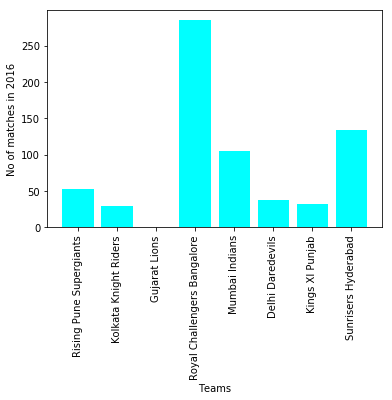

In [19]:
plt.bar(list(extraRuns_dist.keys()), list(extraRuns_dist.values()),color='cyan')
plt.xlabel("Teams")
plt.ylabel("No of matches in 2016")
plt.xticks(rotation='90')

In [13]:
bowler_dist = {}
over_dict = {}
match_id = []
over = 0
final_dict = {}

for row in matches_csv:
    if int(row['season']) == 2015:
        match_id.append(row['id'])
for row in deliveries_csv:
    if row['match_id'] in match_id:
        if row['bowler'] not in bowler_dist.keys():
            bowler_dist[row['bowler']] = 0
            over_dict[row['bowler']] = 0
        if over != row['over']:
            over = row['over']
            over_dict[row['bowler']] += 1
        bowler_dist[row['bowler']] += int(row['total_runs'])
leastRuns = sorted(bowler_dist.values())[0:10]
bowler_run_rate = {}
for k, v in bowler_dist.items():
    bowler_run_rate[k] = v / over_dict.get(k)

leastRuns = sorted(bowler_run_rate.values())[0:10]
for name, rate in bowler_run_rate.items():
    for x in leastRuns:
        if rate == x:
            final_dict[name] = rate

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

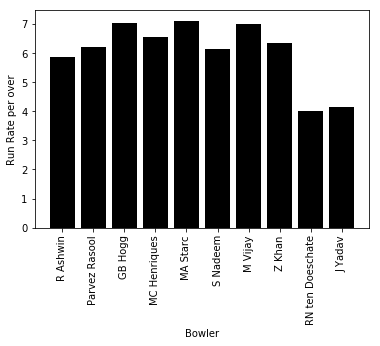

In [14]:
plt.bar(list(final_dict.keys()), list(final_dict.values()),color='black')
plt.xlabel("Bowler")
plt.ylabel("Run Rate per over")
plt.xticks(rotation='90')

In [15]:
score_card = []
team_win_rate={}

with open("matches.csv") as file:
    # temporary list
    all_teams = []
    data = csv.reader(file)
    its_flag_header = True
    for row in data:
        # Skipping header row
        if its_flag_header:
            its_flag_header = False
            continue
        # Skipping no contest matches
        if row[10] == "":
            continue
        # inserting new team in our actual & temporary list
        if row[4] not in all_teams:
            all_teams.append(row[4])
            score_card.append([row[4], {"win": 0}, {"loss": 0}])
        if row[5] not in all_teams:
            all_teams.append(row[5])
            score_card.append([row[5], {"win": 0}, {"loss": 0}])
        # getting index of winner and looser
        if row[4] == row[10]:
            win = all_teams.index(row[4])
            loss = all_teams.index(row[5])
        else:
            win = all_teams.index(row[5])
            loss = all_teams.index(row[4])
        # Updating winner & looser
        score_card[win][1].update(
            {"win": score_card[win][1].get("win") + 1}
        )
        score_card[loss][2].update(
            {"loss": score_card[loss][2].get("loss") + 1}
        )
for x in score_card:
    team_win_rate[x[0]]= x[1].get("win")/ x[2].get("loss")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

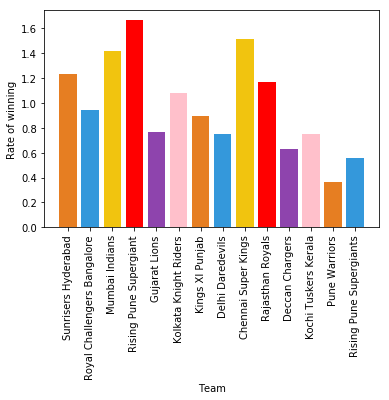

In [16]:
plt.bar(list(team_win_rate.keys()), list(team_win_rate.values()), color=['#e67e22', '#3498db', '#f1c40f', 'r', '#8e44ad', 'pink'])
plt.xlabel("Team")
plt.ylabel("Rate of winning")
plt.xticks(rotation='90')